In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import tensorflow as tf
print(tf.__version__)
import keras
print(keras.__version__)

/home/sunxin/miniconda3/envs/qinhanmin-test/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sunxin/miniconda3/envs/qinhanmin-test/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sunxin/miniconda3/envs/qinhanmin-test/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sunxin/minico

1.13.2
2.2.4


Using TensorFlow backend.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import reuters
from keras.utils import to_categorical
from keras import models
from keras import layers

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [4]:
print(len(train_data))
print(len(test_data))
print(train_data[0])

8982
2246
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 0 -> padding
# 1 -> start of sequence
# 2 -> unknown
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [6]:
def vectorize_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

X_train = vectorize_sequence(train_data)
X_test = vectorize_sequence(test_data)

In [7]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [8]:
model = models.Sequential()
model.add(layers.Dense(64, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(46, activation="softmax"))
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
X_val = X_train[:1000]
partial_X_train = X_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [10]:
history = model.fit(partial_X_train, partial_y_train,
                    epochs=20, batch_size=512,
                    validation_data=(X_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 354us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 72us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 71us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 76us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 77us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 78us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 78us/step - loss: 0.4581 - acc: 0.

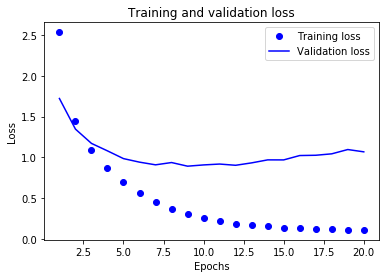

In [11]:
loss_values = history.history["loss"]
val_loss_values = history.history["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

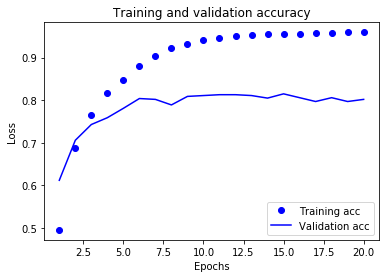

In [12]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
model = models.Sequential()
model.add(layers.Dense(64, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(46, activation="softmax"))
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(X_train, one_hot_train_labels, epochs=9, batch_size=512)
results = model.evaluate(X_test, one_hot_test_labels)
print(results)

Epoch 1/9
8982/8982 [==============================] - 1s 78us/step - loss: 2.4437 - acc: 0.5332
Epoch 2/9
8982/8982 [==============================] - 1s 58us/step - loss: 1.3241 - acc: 0.7161
Epoch 3/9
8982/8982 [==============================] - 1s 57us/step - loss: 0.9744 - acc: 0.7869
Epoch 4/9
8982/8982 [==============================] - 1s 59us/step - loss: 0.7565 - acc: 0.8390
Epoch 5/9
8982/8982 [==============================] - 1s 63us/step - loss: 0.5963 - acc: 0.8764
Epoch 6/9
8982/8982 [==============================] - 1s 64us/step - loss: 0.4751 - acc: 0.9009
Epoch 7/9
8982/8982 [==============================] - 1s 64us/step - loss: 0.3831 - acc: 0.9175
Epoch 8/9
8982/8982 [==============================] - 1s 64us/step - loss: 0.3076 - acc: 0.9348
Epoch 9/9
2246/2246 [==============================] - 0s 88us/step
[0.9800314027500917, 0.7902938557966204]


In [14]:
predictions = model.predict(X_test)
print(predictions[0].shape)
print(np.sum(predictions[0]))
print(np.argmax(predictions[0]))

(46,)
0.9999999
3


In [16]:
# A different way to handle the labels and the loss
y_train = np.array(train_labels)
y_test = np.array(test_labels)
model = models.Sequential()
model.add(layers.Dense(64, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(46, activation="softmax"))
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(X_train, y_train, epochs=9, batch_size=512)
results = model.evaluate(X_test, y_test)
print(results)

Epoch 1/9
8982/8982 [==============================] - 1s 82us/step - loss: 2.4610 - acc: 0.5310
Epoch 2/9
8982/8982 [==============================] - 1s 58us/step - loss: 1.3062 - acc: 0.7224
Epoch 3/9
8982/8982 [==============================] - 1s 63us/step - loss: 0.9772 - acc: 0.7887
Epoch 4/9
8982/8982 [==============================] - 1s 64us/step - loss: 0.7651 - acc: 0.8392
Epoch 5/9
8982/8982 [==============================] - 1s 64us/step - loss: 0.6098 - acc: 0.8761
Epoch 6/9
8982/8982 [==============================] - 1s 65us/step - loss: 0.4811 - acc: 0.9017
Epoch 7/9
8982/8982 [==============================] - 1s 65us/step - loss: 0.3913 - acc: 0.9185
Epoch 8/9
8982/8982 [==============================] - 1s 66us/step - loss: 0.3160 - acc: 0.9305
Epoch 9/9
2246/2246 [==============================] - 0s 88us/step
[0.9572788709418008, 0.7960819234724885]


In [15]:
# On the importance of having sufficiently large intermediate layers
model = models.Sequential()
model.add(layers.Dense(64, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(4, activation="relu"))
model.add(layers.Dense(46, activation="softmax"))
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_X_train, partial_y_train,
          epochs=20, batch_size=512,
          validation_data=(X_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 95us/step - loss: 3.4490 - acc: 0.0475 - val_loss: 3.1808 - val_acc: 0.0460
Epoch 2/20
7982/7982 [==============================] - 1s 68us/step - loss: 2.8819 - acc: 0.1792 - val_loss: 2.7112 - val_acc: 0.3470
Epoch 3/20
7982/7982 [==============================] - 1s 71us/step - loss: 2.3903 - acc: 0.4521 - val_loss: 2.2938 - val_acc: 0.5170
Epoch 4/20
7982/7982 [==============================] - 1s 74us/step - loss: 1.9803 - acc: 0.5852 - val_loss: 1.9762 - val_acc: 0.5560
Epoch 5/20
7982/7982 [==============================] - 1s 73us/step - loss: 1.6895 - acc: 0.6158 - val_loss: 1.7444 - val_acc: 0.6100
Epoch 6/20
7982/7982 [==============================] - 1s 74us/step - loss: 1.4829 - acc: 0.6433 - val_loss: 1.6312 - val_acc: 0.6190
Epoch 7/20
7982/7982 [==============================] - 1s 73us/step - loss: 1.3286 - acc: 0.6646 - val_loss: 1.5194 - val_acc: 0.6490
Epoch 8